# USDPEN Analysis

In [44]:
!pip install yfinance

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


In [2]:
import yfinance as yf
import datetime as dt

/Users/iapaza/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [5]:
start_date = dt.datetime.today() - dt.timedelta(days=10000)  # Collecting 10000 days.
end_date = dt.datetime.today()
stock = "USDPEN=X"

# Download the data
data = yf.download(stock, start=start_date, end=end_date)

# Delete the first three rows
data = data.iloc[3:] 


# Create your own labels (replace with your desired labels)
data.columns = ['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']

# Save the data to a CSV file
data.to_csv("usd_pen.csv")


[*********************100%***********************]  1 of 1 completed


In [6]:
import pandas as pd
from Technicals import * # Importing functions to construct technical indicators.
import matplotlib.pyplot as plt

In [7]:
# Load the USDPEN data
print(data)
data = pd.read_csv('usd_pen.csv')
print(data)

                           Adj Close     Close      High       Low      Open  \
Date                                                                           
2001-06-05 00:00:00+00:00   3.623000  3.623000  3.623000  3.623000  3.623000   
2001-06-06 00:00:00+00:00   3.623000  3.623000  3.623000  3.623000  3.623000   
2001-06-07 00:00:00+00:00   3.623000  3.623000  3.623000  3.623000  3.623000   
2001-06-08 00:00:00+00:00   3.623000  3.623000  3.623000  3.623000  3.623000   
2001-06-11 00:00:00+00:00   3.623000  3.623000  3.623000  3.623000  3.623000   
...                              ...       ...       ...       ...       ...   
2024-10-16 00:00:00+00:00   3.758600  3.758600  3.768500  3.691374  3.758600   
2024-10-17 00:00:00+00:00   3.769000  3.769000  3.769000  3.693285  3.769000   
2024-10-18 00:00:00+00:00   3.765000  3.765000  3.706331  3.695349  3.765000   
2024-10-21 00:00:00+00:00   3.684273  3.684273  3.751100  3.679245  3.684273   
2024-10-22 00:00:00+00:00   3.763900  3.

In [8]:
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

In [9]:
print(data.describe()) # First Exploration

         Adj Close        Close         High          Low         Open  Volume
count  6094.000000  6094.000000  6094.000000  6094.000000  6094.000000  6094.0
mean      3.227185     3.227185     3.238927     3.193959     3.204113     0.0
std       0.369900     0.369900     0.365195     0.363573     0.370029     0.0
min       0.784400     0.784400     2.484800     0.784400     2.479700     0.0
25%       2.905900     2.905900     2.915275     2.884500     2.888575     0.0
50%       3.264000     3.264000     3.274000     3.215200     3.219900     0.0
75%       3.478000     3.478000     3.480000     3.471000     3.475000     0.0
max       4.136000     4.136000     4.136000     4.064206     4.094000     0.0


## Exploration of the rates distribution.

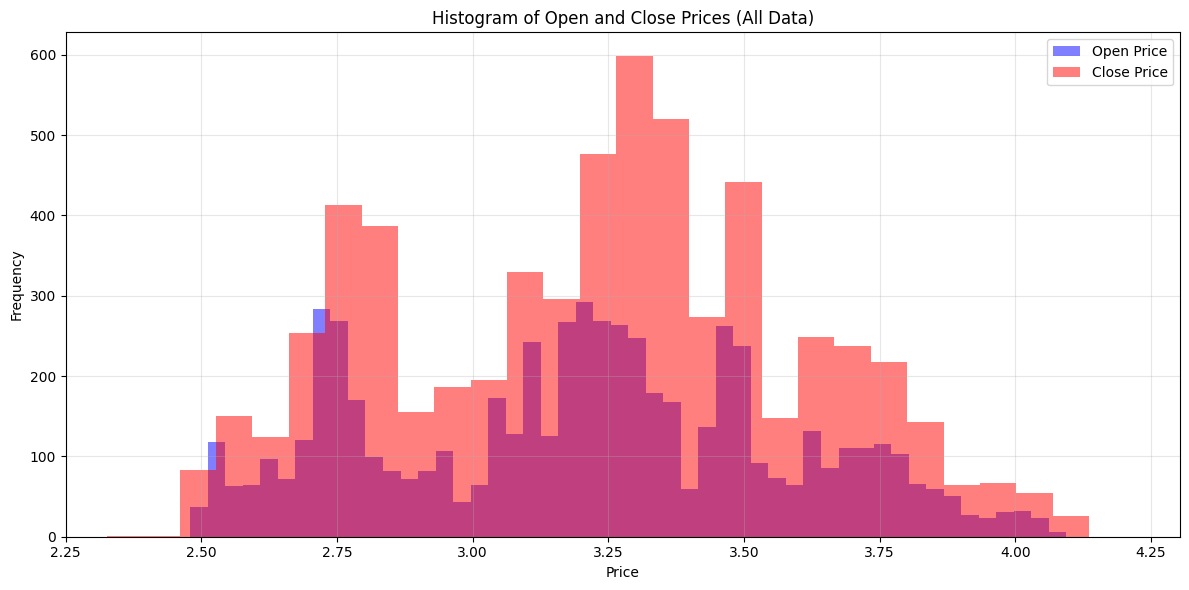

In [10]:
plt.figure(figsize=(12, 6))

# Use the entire 'data' DataFrame
plt.hist(data['Open'], bins=50, color='blue', alpha=0.5, label='Open Price')
plt.hist(data['Close'], bins=50, color='red', alpha=0.5, label='Close Price')

# Adding title and labels
plt.title('Histogram of Open and Close Prices (All Data)') # Updated title
plt.xlabel('Price')
plt.ylabel('Frequency')

# Add a legend
plt.legend()

# Improve plot aesthetics
plt.grid(True, alpha=0.3)  # Add a subtle grid
plt.xlim(2.25, None)  # Start x-axis from 2 
plt.tight_layout()
plt.show()

We see that the whole data does not follow a classic distribution pattern.

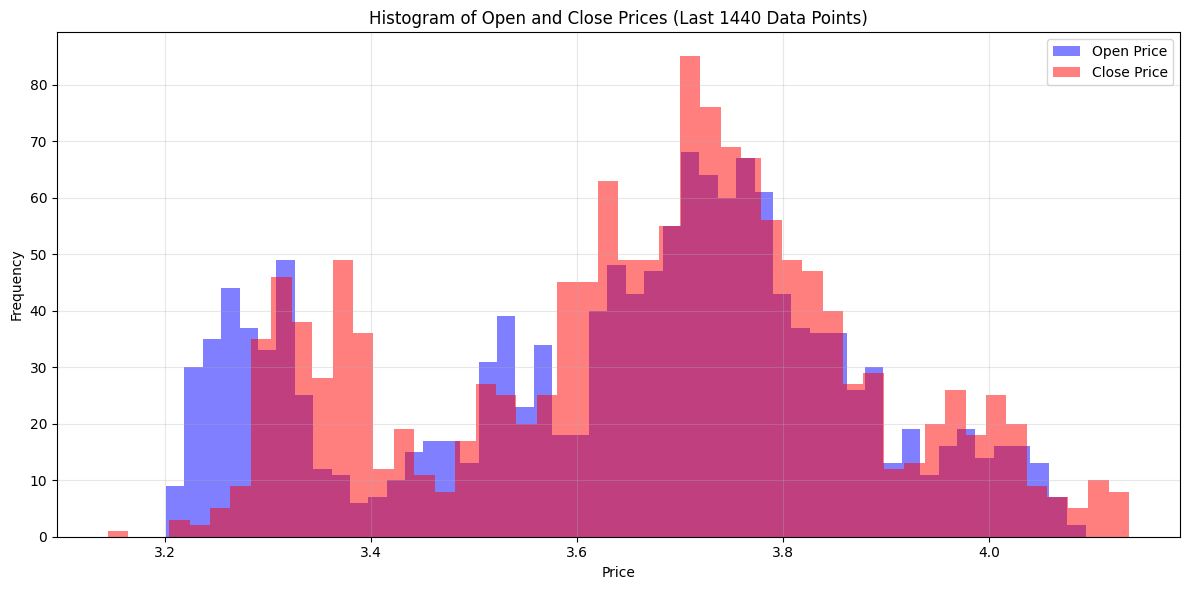

In [11]:
plt.figure(figsize=(12, 6))
data_last_1200 = data.iloc[-1440:]  

plt.hist(data_last_1200['Open'], bins=50, color='blue', alpha=0.5, label='Open Price')
plt.hist(data_last_1200['Close'], bins=50, color='red', alpha=0.5, label='Close Price')

# Adding title and labels
plt.title('Histogram of Open and Close Prices (Last 1440 Data Points)')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Add a legend
plt.legend()

# Improve plot aesthetics
plt.grid(True, alpha=0.3)  # Add a subtle grid
plt.tight_layout()
plt.show()

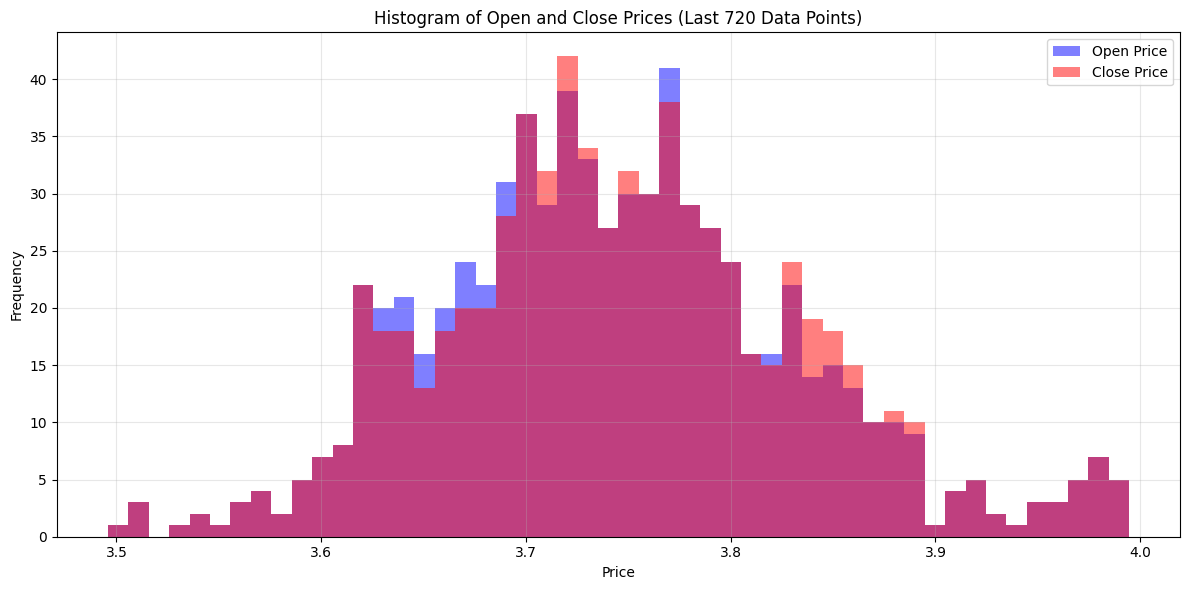

In [12]:
plt.figure(figsize=(12, 6))
data_last_1200 = data.iloc[-360*2:]  

plt.hist(data_last_1200['Open'], bins=50, color='blue', alpha=0.5, label='Open Price')
plt.hist(data_last_1200['Close'], bins=50, color='red', alpha=0.5, label='Close Price')

# Adding title and labels
plt.title('Histogram of Open and Close Prices (Last 720 Data Points)')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Add a legend
plt.legend()

# Improve plot aesthetics
plt.grid(True, alpha=0.3)  # Add a subtle grid
plt.tight_layout()
plt.show()

As we reduce the data to more present datapoints, the distribution seems gaussian.

In [13]:
from scipy.stats import shapiro, kstest, normaltest

data_to_test = data.iloc[-5000:]['Open']

import statsmodels.api as sm

# Statistical Tests
# Shapiro-Wilk Test
stat, p = shapiro(data_to_test)
print('Shapiro-Wilk Test: Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')


# Kolmogorov-Smirnov Test   

stat, p = kstest(data_to_test, 'norm')  # 'norm' for normal distribution
print('\nKolmogorov-Smirnov Test: Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

# D'Agostino-Pearson Test
stat, p = normaltest(data_to_test)
print('\nD\'Agostino-Pearson Test: Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Shapiro-Wilk Test: Statistics=0.962, p=0.000
Sample does not look Gaussian (reject H0)

Kolmogorov-Smirnov Test: Statistics=0.993, p=0.000
Sample does not look Gaussian (reject H0)

D'Agostino-Pearson Test: Statistics=490.074, p=0.000
Sample does not look Gaussian (reject H0)


Tests reject hypotesis of originative gaussian distribution.

In [14]:
data_to_test = data.iloc[-360:]['Open']

# Statistical Tests
# Shapiro-Wilk Test
stat, p = shapiro(data_to_test)
print('Shapiro-Wilk Test: Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')


# Kolmogorov-Smirnov Test   

stat, p = kstest(data_to_test, 'norm')  # 'norm' for normal distribution
print('\nKolmogorov-Smirnov Test: Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

# D'Agostino-Pearson Test
stat, p = normaltest(data_to_test)
print('\nD\'Agostino-Pearson Test: Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Shapiro-Wilk Test: Statistics=0.993, p=0.108
Sample looks Gaussian (fail to reject H0)

Kolmogorov-Smirnov Test: Statistics=1.000, p=0.000
Sample does not look Gaussian (reject H0)

D'Agostino-Pearson Test: Statistics=0.943, p=0.624
Sample looks Gaussian (fail to reject H0)


Gaussian similarities found in a year timeframe.

# A very detailed description of the data.

## Lets evaluate how much autocorrelation the variables obey.


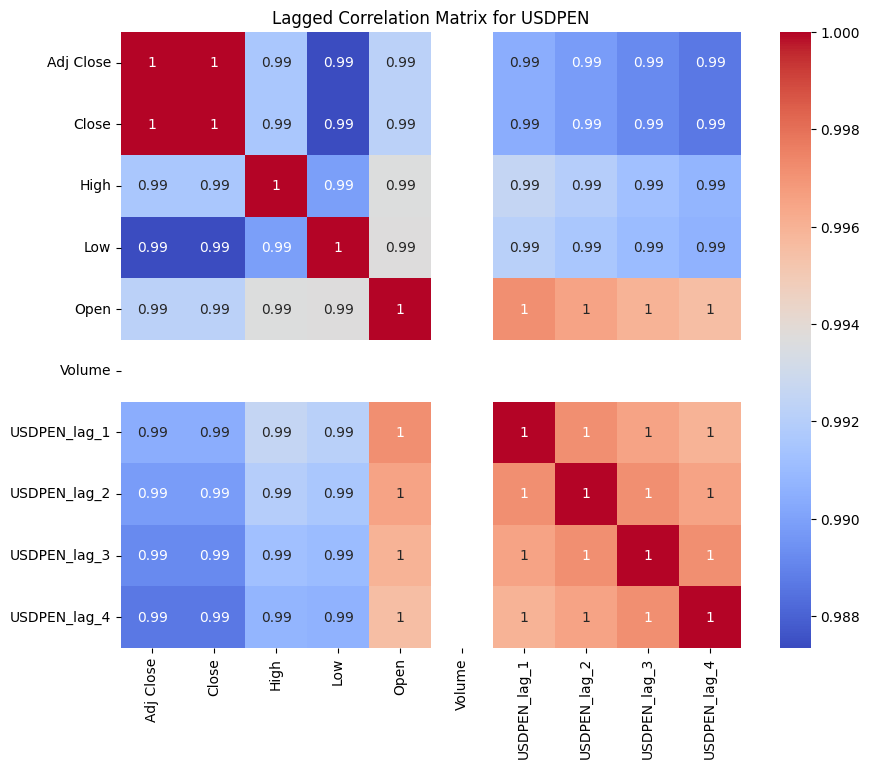

In [19]:
import seaborn as sns

# Create lagged versions of the 'USDPEN' time series (e.g., lag 1, lag 2, etc.)
lagged_data = pd.DataFrame()

# Create lagged columns for USDPEN (e.g., lag by 1 day, 2 days, etc.)
for lag in range(1, 5):  # Choose up to lag 3 for example
    lagged_data[f'USDPEN_lag_{lag}'] = data['Open'].shift(lag)

# Combine lagged data with the original
combined_data = pd.concat([data, lagged_data], axis=1).dropna()

# Compute the correlation matrix
correlation_matrix = combined_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Lagged Correlation Matrix for USDPEN')
plt.show()

# Easy to see a strong autocorrelation, problem for the iid assumption seen in class. Lets do some feature modification to improve this.

In [20]:
# First, we identify a trend, given by the cross of the SMA and the baseline. Lets calculate the other thecnical indicators.

'''
Calculating Technical indicators.
'''

# MACD
data['MACD'], data['MACD Signal'], data['MACD Histogram'] = calculate_macd(data['Open'])

# SMA
window_sizes = [5, 10, 15, 20, 25, 30, 36]

# Calculate SMAs and add them to the DataFrame
data = calculate_sma(data, window_sizes)

# RSIs
rsi_window_sizes = [5, 14, 20, 25]

# Calculate RSI and add them to the DataFrame
data = calculate_rsi(data, rsi_window_sizes)

# ADXs
adx_window_sizes = [5, 10, 15, 20, 25, 30, 35]

# Calculate ADX for specified window sizes and add them to the DataFrame
data = calculate_adx(data, adx_window_sizes)

# WRs
wr_window_sizes = [5, 14, 20, 25]

# Calculate WR for specified window sizes and add them to the DataFrame
data = calculate_wr(data, wr_window_sizes)

#Bollinger Bands
bollinger_window = 20  # Standard period for Bollinger Bands
num_std_dev = 2  # Standard deviations
data = calculate_bollinger_bands(data, bollinger_window, num_std_dev)

In [21]:
# Graphs

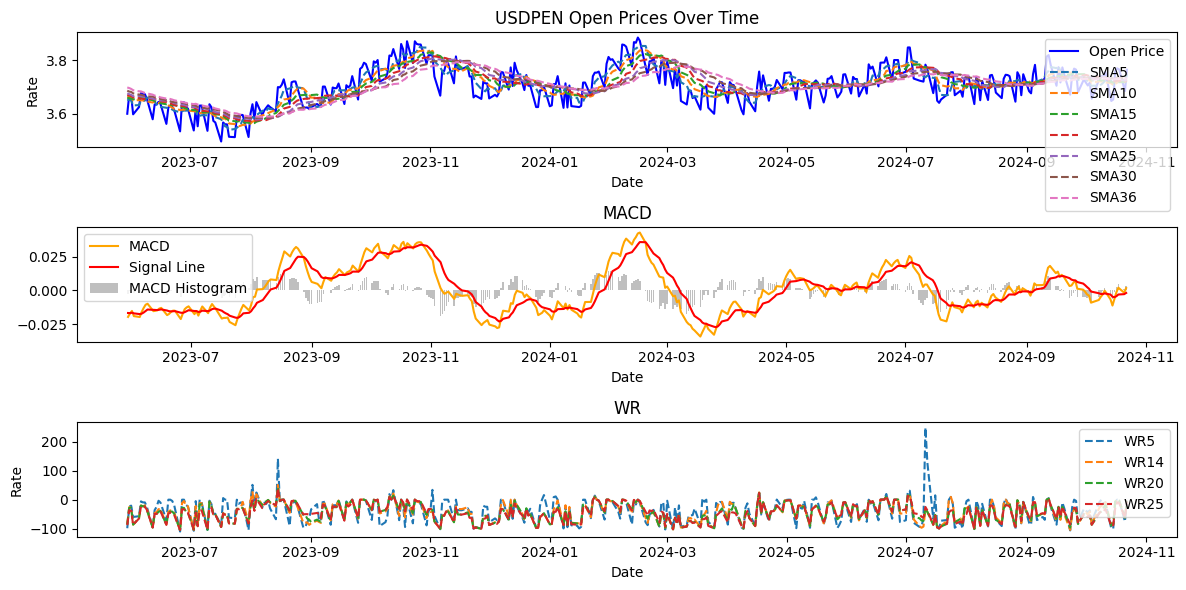

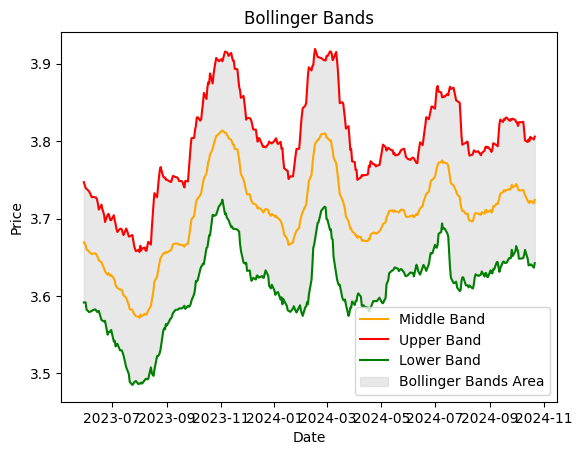

In [22]:

# Filter for the last 365 data points
data_last_365 = data.iloc[-365:]

# Plotting Open Prices
plt.figure(figsize=(12, 6))

# Subplot for Open Prices
plt.subplot(3, 1, 1)
plt.plot(data_last_365['Open'], label='Open Price', color='blue')
for window in window_sizes:
    plt.plot(data_last_365[f'SMA{window}'], label=f'SMA{window}', linestyle='--')
plt.title('USDPEN Open Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Rate')
plt.legend()

# Subplot for MACD
plt.subplot(3, 1, 2)
plt.plot(data_last_365['MACD'], label='MACD', color='orange')
plt.plot(data_last_365['MACD Signal'], label='Signal Line', color='red')
plt.bar(data_last_365.index, data_last_365['MACD Histogram'], label='MACD Histogram', color='gray', alpha=0.5)
plt.title('MACD')
plt.xlabel('Date')  # Adding x-label for the second subplot
plt.legend()

plt.subplot(3, 1, 3)

for window in wr_window_sizes:
    plt.plot(data_last_365[f'WR{window}'], label=f'WR{window}', linestyle='--')

plt.title('WR')
plt.xlabel('Date')
plt.ylabel('Rate')
plt.legend()



plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


# Subplot for Bollinger Bands
plt.subplot(1, 1, 1)
plt.plot(data_last_365['Bollinger Middle Band'], label='Middle Band', color='orange')
plt.plot(data_last_365['Bollinger Upper Band'], label='Upper Band', color='red')
plt.plot(data_last_365['Bollinger Lower Band'], label='Lower Band', color='green')
plt.fill_between(data_last_365.index,
                 data_last_365['Bollinger Upper Band'],
                 data_last_365['Bollinger Lower Band'],
                 color='lightgray', alpha=0.5, label='Bollinger Bands Area')

plt.title('Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


## Lets make use of the histogram showed in MACD to classify our data in up (1) or down (2). Our features will be the thechnical indicators

In [31]:
# MACD
Target_MACD_Signal = calculate_macd(data['Open'])[2]>0

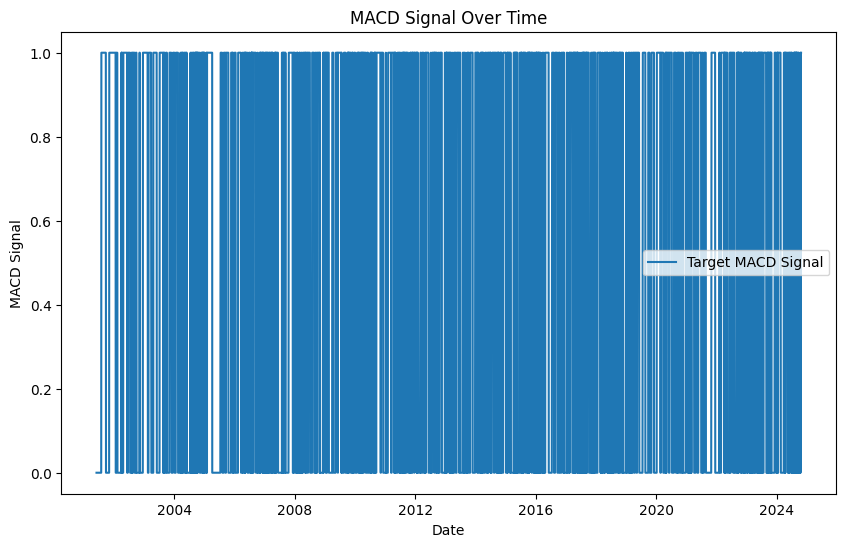

In [32]:
# Plot 'Target_MACD_Signal'
plt.figure(figsize=(10,6))
plt.plot(Target_MACD_Signal, label='Target MACD Signal')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('MACD Signal')
plt.title('MACD Signal Over Time')
plt.legend()

# Show the plot
plt.show()

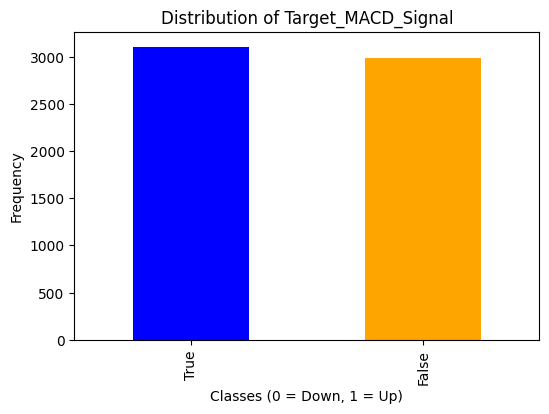

In [33]:
# Plot the distribution of Target_MACD_Signal
plt.figure(figsize=(6,4))
Target_MACD_Signal.value_counts().plot(kind='bar', color=['blue', 'orange'])

# Add labels and title
plt.xlabel('Classes (0 = Down, 1 = Up)')
plt.ylabel('Frequency')
plt.title('Distribution of Target_MACD_Signal')

# Show the plot
plt.show()

In [34]:
# Identifying the features, not including the ones that build our trend:
X = data.drop(['MACD', 'MACD Signal', 'MACD Histogram'], axis=1)

# Target: Use the 'Trend' column as the dependent variable
y = Target_MACD_Signal

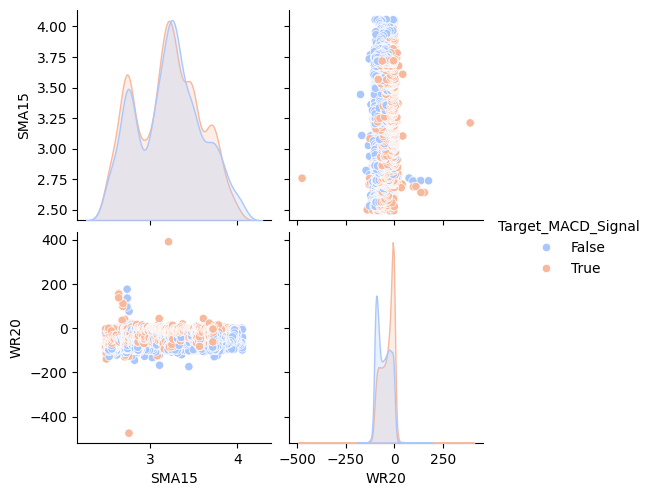

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the features and the target
selected_features = X[['SMA15', 'WR20']].copy()  # Ensure to copy the DataFrame
selected_features['Target_MACD_Signal'] = Target_MACD_Signal  # Add target variable to the DataFrame

# Create a pairplot with the selected features
sns.pairplot(selected_features, hue='Target_MACD_Signal', palette='coolwarm')

# Show the plot
plt.show()

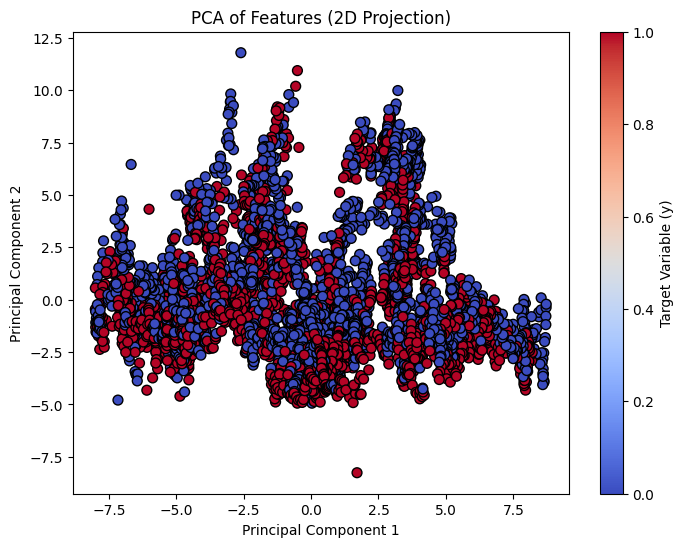

In [40]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
# Drop rows with any missing values
X_cleaned = X.dropna()

# If y is a separate target vector, ensure to drop the same rows from y
y_cleaned = y[X_cleaned.index]

# Proceed with PCA using X_cleaned
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X_cleaned)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], c=y_cleaned, edgecolor='k', s=50, cmap='coolwarm')
plt.colorbar(scatter, label='Target Variable (y)')
plt.title('PCA of Features (2D Projection)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [42]:
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

# Assuming `data` is your DataFrame with features and target
# Replace 'Target_MACD_Signal' with the appropriate target variable column
X = pca_result
y = Target_MACD_Signal  # Your binary target variable

X = pd.DataFrame(X)

# Handle missing values
X = X.dropna()
y = y[X.index]  # Ensure y matches the cleaned X

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create and train the Perceptron
perceptron = Perceptron(max_iter=1000, random_state=42)
perceptron.fit(X_train, y_train)

# Make predictions
y_pred = perceptron.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[432 173]
 [390 210]]

Classification Report:
              precision    recall  f1-score   support

       False       0.53      0.71      0.61       605
        True       0.55      0.35      0.43       600

    accuracy                           0.53      1205
   macro avg       0.54      0.53      0.52      1205
weighted avg       0.54      0.53      0.52      1205



/var/folders/8v/mn6s306n0x5_n3dj8j70rzfr0000gn/T/ipykernel_2932/2892753412.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = y[X.index]  # Ensure y matches the cleaned X


In [46]:
# Logistic:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Assuming `data` is your DataFrame with features and target
# Replace 'Target_MACD_Signal' with the actual name of your target column
X = data.drop(['MACD', 'MACD Signal', 'MACD Histogram'], axis=1)  # Select relevant features
y = Target_MACD_Signal  #  binary target variable


# Handle missing values
# Handle missing values
X = X.dropna()
y = y[X.index]  # Ensure y matches the cleaned X

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=42)

# Create and train the Logistic Regression model
logistic_regression = LogisticRegression(random_state=42)
logistic_regression.fit(X_train, y_train)

# Make predictions
y_pred = logistic_regression.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[294   0]
 [  0 309]]

Classification Report:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       294
        True       1.00      1.00      1.00       309

    accuracy                           1.00       603
   macro avg       1.00      1.00      1.00       603
weighted avg       1.00      1.00      1.00       603



In [48]:
# Considering auto regression:

for lag in range(1, 6):  # Create lagged features for the past 5 days
    X[f'Trend_Lag_{lag}'] = y.shift(lag)


X.dropna(inplace=True)
y = y[X.index]  # Ensure y matches the cleaned X

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model
logistic_regression.fit(X_train_scaled, y_train)

# Make predictions
y_pred = logistic_regression.predict(X_test_scaled)

# Evaluate the model
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[592   0]
 [  0 612]]
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       592
        True       1.00      1.00      1.00       612

    accuracy                           1.00      1204
   macro avg       1.00      1.00      1.00      1204
weighted avg       1.00      1.00      1.00      1204



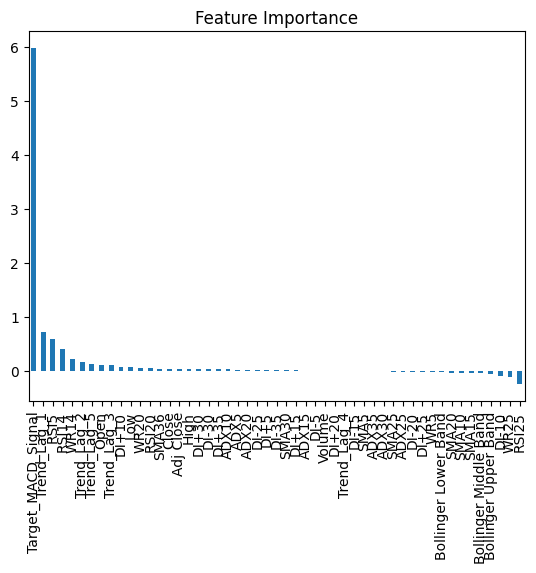

In [51]:
import pandas as pd

# Get coefficients
coef = pd.Series(logistic_regression.coef_[0], index=X.columns)
coef.sort_values(ascending=False).plot(kind='bar')
plt.title('Feature Importance')
plt.show()
